
Logistic Regression Coefficients:
                   Feature  Coefficient
0                 OverTime     0.703564
5           BusinessTravel     0.259402
1         DistanceFromHome     0.162355
2          WorkLifeBalance    -0.159575
4  EnvironmentSatisfaction    -0.324161
3          JobSatisfaction    -0.334957


<ipython-input-6-7163f680a608>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')


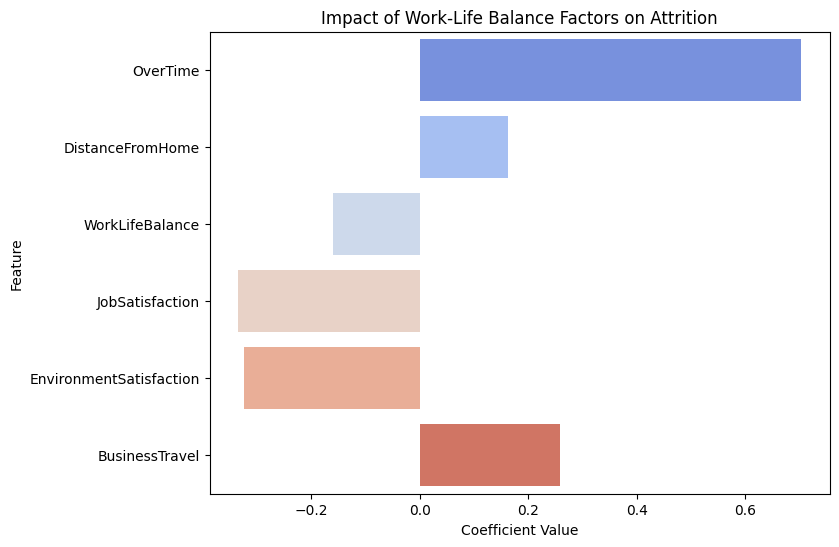


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       380
           1       0.35      0.21      0.27        61

    accuracy                           0.84       441
   macro avg       0.62      0.57      0.59       441
weighted avg       0.81      0.84      0.82       441


Random Forest ROC-AUC Score: 0.66


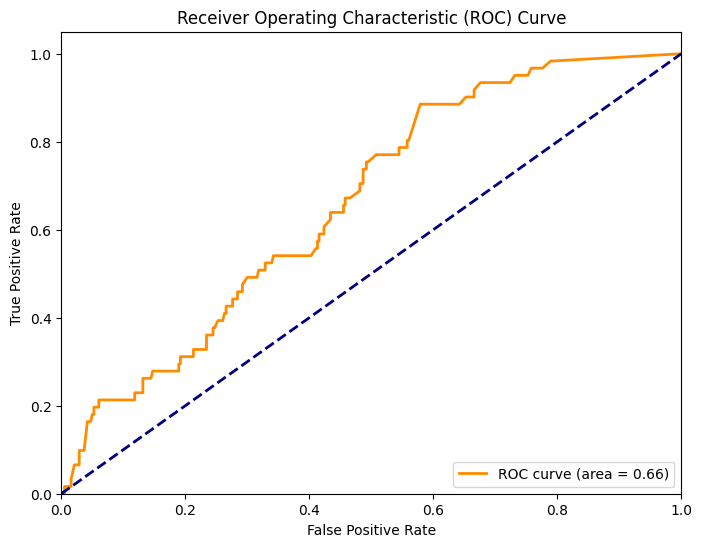

In [6]:
# ------------------ IMPORT LIBRARIES ------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd

# ------------------ INGEST DATA FROM CSV ------------------
# Load the dataset
file_path = "IBM_HR_Employees.csv"
data = pd.read_csv(file_path)

# ------------------ DATA PREPROCESSING ------------------
# Convert 'Attrition', 'OverTime', and 'BusinessTravel' to numeric values
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
data['OverTime'] = data['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
data['BusinessTravel'] = data['BusinessTravel'].apply(lambda x: 1 if x == 'Travel_Frequently' else 0)

# Select relevant features and target variable
work_life_cols = ['OverTime', 'DistanceFromHome', 'WorkLifeBalance', 'JobSatisfaction', 'EnvironmentSatisfaction', 'BusinessTravel']
target_col = 'Attrition'

# Features (X) and Target (y)
X = data[work_life_cols]
y = data[target_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------ MODEL TRAINING AND EVALUATION ------------------
def train_and_evaluate_model(X_train, X_test, y_train, y_test, work_life_cols):
    """
    Train Logistic Regression and Random Forest models, evaluate performance, and print metrics.
    """
    # Logistic Regression
    log_model = LogisticRegression(random_state=42)
    log_model.fit(X_train, y_train)

    # Display Logistic Regression Coefficients
    coefficients = pd.DataFrame({'Feature': work_life_cols, 'Coefficient': log_model.coef_[0]})
    print("\nLogistic Regression Coefficients:")
    print(coefficients.sort_values(by='Coefficient', ascending=False))

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')
    plt.title('Impact of Work-Life Balance Factors on Attrition')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()

    # Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictions and Evaluation
    y_pred_rf = rf_model.predict(X_test)
    print("\nRandom Forest Classification Report:")
    print(classification_report(y_test, y_pred_rf))

    # Calculate and print ROC-AUC for Random Forest
    roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
    print(f"\nRandom Forest ROC-AUC Score: {roc_auc:.2f}")

    fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Train and evaluate models
train_and_evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test, work_life_cols)
